In [3]:
import pandas as pd 
import numpy as np
pd.set_option('display.max_columns',None)
from sklearn.feature_extraction.text import CountVectorizer
import jieba # 导入关键字提取库
import pandas as pd  # 导入pandas
# import newspaper

In [9]:
def improt_data(lujing,code):
    data = pd.read_excel(lujing,encoding =code)
    return data

def wenzi(data,z,a):
    list_2 = []
    list_3 = []
    lis = []
    
    for row,data_ in data.iterrows():
        name = data_['订单号']
        list_3.append(name)
        y = data_[a]
        tr = y.find(z)
        if tr > -1 :
            list_2.append(y)
    print('关于' + '“' + z + '”' + '的订单数量是：',len(list_2))  
    lis.append(list_2)
    lis.append(list_3)
    return lis

def jiebe(data):    
    text_list = []
    for line in data:
        hou = ",".join(jieba.cut(line))
        strlist = hou.split(',') 
        text_list.append(strlist)
    return text_list

def clean(list_name_,stopwords_):    
    clean_line = []
    for line in list_name_:
        haha = []
        for word in line:
            if word in stopwords_:
                continue
            haha.append(word)
        haha = ','.join(haha)
        clean_line.append(haha)

    return clean_line

def drop_du(data,a):
    df = data.drop_duplicates(subset=a,inplace=False,keep = 'last')
    list_ = list(df[a])
    list_sum = []
    list_sum_ = []
    list__ = []
    for i in range(len(list_)):
        b = list_[i]
        sum_ = data[data[a] == b ]['订单号'].count()
        dict_ = {}
    
        if sum_ > 1 :
            list__.append(b)
            dict_ = {b:sum_}
            list_sum.append(dict_)
        else:
            list__.append(b)
            dict_ = {b:sum_}
            list_sum_.append(dict_)
        i = i + 1  
    k = [list_sum,list_sum_,list__]
    return k

In [10]:
lujing = r'C:/Users/Administrator/datas/Airsng/1训练模型/美团团购/七夕节/七夕订单1.xlsx'
code = 'utf8'
df = improt_data(lujing,code)

In [12]:
df

,日期,商品类型,商品id,商品名称,商品售卖量,商品售卖金额,曝光人数,访问人数
0,2020-08-24,团购,35804226,【约会爆款】11枝玫瑰礼盒套餐,2,338.0,3967,219
1,2020-08-24,团购,35818597,【约会推荐】11枝玫瑰爆款花束,0,0.0,243,40
2,2020-08-24,团购,35818693,【邂逅爱情】11枝玫瑰表白花束,2,338.0,269,69
3,2020-08-24,团购,35825487,【网红爆款】康乃馨百合混搭花束,0,0.0,1004,40
4,2020-08-24,团购,35825649,【感恩玫瑰】向日葵玫瑰鲜花花束,0,0.0,140,28
...,...,...,...,...,...,...,...,...
149,2020-08-25,团购,617947112,开业花篮套餐一对,0,0.0,2,0
150,2020-08-25,团购,619925255,【一见钟情】满天星表白花束,0,0.0,239,86
151,2020-08-25,团购,625902734,鞠躬尽瘁6朵向日葵搭配桔梗花束,0,0.0,1,1
152,2020-08-25,团购,640866512,33枝蓝色妖姬韩式花束,0,0.0,3,1


In [13]:
df = df[df['商品售卖金额'] > 0]
df = df[df['商品售卖量'] >1]
df['商品售卖金额'].sum()

8887.0

In [14]:
df

,日期,商品类型,商品id,商品名称,商品售卖量,商品售卖金额,曝光人数,访问人数
0,2020-08-24,团购,35804226,【约会爆款】11枝玫瑰礼盒套餐,2,338.0,3967,219
2,2020-08-24,团购,35818693,【邂逅爱情】11枝玫瑰表白花束,2,338.0,269,69
8,2020-08-24,团购,35825981,【天缘巧合】33枝玫瑰鲜花花束,2,598.0,241,65
9,2020-08-24,团购,35826014,【满心欢喜】19枝玫瑰鲜花花束,3,597.0,80,70
12,2020-08-24,团购,35826239,【用心爱你】33枝玫瑰表白礼盒,2,538.0,71,35
20,2020-08-24,团购,35826671,【美轮美奂】9支玫瑰鲜花花束,2,238.0,47,72
79,2020-08-25,团购,35804226,【约会爆款】11枝玫瑰礼盒套餐,10,1810.0,8252,546
88,2020-08-25,团购,35826014,【满心欢喜】19枝玫瑰鲜花花束,2,398.0,191,186
89,2020-08-25,团购,35826195,【微微一笑】11枝玫瑰表白花束,4,676.0,1693,187
90,2020-08-25,团购,35826229,【此情不渝】19枝玫瑰礼盒鲜花,2,378.0,3627,229


In [15]:
lis = ['玫瑰','康乃馨','向日葵','礼盒','11','19','33','52',]
for i  in lis:
    wenzi(df,i,'商品名称')

【约会爆款】11枝玫瑰礼盒套餐
12
2148.0
----------------
【邂逅爱情】11枝玫瑰表白花束
2
338.0
----------------
【天缘巧合】33枝玫瑰鲜花花束
2
598.0
----------------
【满心欢喜】19枝玫瑰鲜花花束
5
995.0
----------------
【用心爱你】33枝玫瑰表白礼盒
2
538.0
----------------
【美轮美奂】9支玫瑰鲜花花束
10
1190.0
----------------
【微微一笑】11枝玫瑰表白花束
4
676.0
----------------
【此情不渝】19枝玫瑰礼盒鲜花
2
378.0
----------------
【夕颜若雪】11枝康乃馨鲜花束
2
216.0
----------------
【春水盈盈】21枝玫瑰鲜花花束
2
438.0
----------------
【钟爱一生】11支玫瑰鲜花花束
6
1014.0
----------------
【一心一意】11枝玫瑰表白礼盒
2
358.0
----------------


In [34]:
lujing = r'C:/Users/Administrator/datas/Airsng/1训练模型/美团团购/七夕节/七夕订单2.xls'
code = 'utf8'
df = improt_data(lujing,code)

In [35]:
df

,下单城市,订单号,下单时间,下单门店,商品名称,商品规格,商品总数,商品总额,实收金额,优惠金额,订单状态,配送方式,商家备注,配送地址,收货人/订货人,收货人/订货人电话,快递单号
0,顺德区,159824200643545320913201,2020-08-24 12:06:46,邂逅花坊鲜花(雅琳花艺店),【夕颜若雪】11枝康乃馨鲜花束,NaN,1,98,98.0,0.0,已完成,商家配送,NaN,广东省佛山市顺德区广东省佛山市顺德区上华北华坊七巷25号,雷,18689281187,NaN
1,仁寿县,159827127461293120835661,2020-08-24 20:14:34,邂逅花坊鲜花(你洋鲜花店),【感恩玫瑰】向日葵玫瑰鲜花花束,NaN,1,189,189.0,0.0,已完成,商家配送,NaN,四川省眉山市仁寿县建设路二段164二楼兰亭荟美容养生会所,王小英,15183327695,NaN
2,石门县,159832461491966230124712,2020-08-25 11:03:35,邂逅花坊鲜花(八姐鲜花店),【如花美眷】11枝玫瑰鲜花礼盒,NaN,1,189,149.0,40.0,已完成,商家配送,NaN,楚江路32号南100米贵族形象(政府广场星级店)湖南省常德市石门县政府广场贵族形象设计,黄小姐,18974277148,NaN
3,长春,159826825736780880135803,2020-08-24 19:24:17,邂逅花坊鲜花(盛缘花卉),【恩情似海】玫瑰康乃馨混搭礼盒,NaN,1,149,149.0,0.0,已完成,商家配送,NaN,吉林省长春市南关区金宇大路1888号吉森·漫桦林3栋2单元1303室,于,13844869665,NaN
4,北京,159824398421709140471843,2020-08-24 12:39:44,邂逅花坊鲜花(艾诺鲜花),【佳人才子】11枝玫瑰鲜花花束,NaN,1,169,169.0,0.0,已完成,商家配送,NaN,北京市大兴区西环中路6号北京久其软件股份有限公司,maggie,18502666103,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
876,灵璧县,159822968607976250481862,2020-08-24 08:41:26,邂逅花坊鲜花(唯爱鲜花坊),到店自取-单枝向日葵,NaN,1,28,28.0,0.0,已完成,到店自取,NaN,NaN,NaN,13454874779,NaN
877,呼和浩特,159823554746553660195696,2020-08-24 10:19:07,窃窃花语,到店自取-单枝向日葵,NaN,1,28,28.0,0.0,已完成,到店自取,NaN,NaN,NaN,18947963046,NaN
878,临江市,159823373462928940609687,2020-08-24 09:48:54,邂逅花坊鲜花(百草卉花店),到店自取-单枝向日葵,NaN,1,28,28.0,0.0,已完成,到店自取,NaN,NaN,NaN,13843928993,NaN
879,抚远市,159823291443221540122500,2020-08-24 09:35:14,邂逅花坊鲜花(抚远伊甸园),到店自取-单枝向日葵,NaN,1,28,28.0,0.0,已完成,商家配送,NaN,黑龙江省佳木斯市抚远市迎宾路5号抚远市委老干部局老年书画研究会,丽丽,15245631171,NaN


In [36]:
df['下单时间'] = pd.to_datetime(df['下单时间'],format='%Y-%m-%d %H:%M:%S')

In [37]:
df['day'] = df['下单时间'].dt.day

In [39]:
drop_du(df,'商品名称')

[[{'11枝玫瑰礼盒表白套餐': 2},
  {'【一世爱人】33枝玫瑰鲜花礼盒': 2},
  {'【琴瑟之好】11枝玫瑰女王花束': 4},
  {'【一生爱你】11枝玫瑰百合花束': 2},
  {'【感恩玫瑰】向日葵玫瑰鲜花花束': 15},
  {'【刻满关怀】19支玫瑰鲜花礼盒': 9},
  {'【砰然心动】爆款表白玫瑰礼盒': 3},
  {'【盛夏光年】33枝玫瑰花束套餐': 9},
  {'【送老师】到店自取小花束单个': 13},
  {'【网红爆款】康乃馨百合混搭花束': 5},
  {'【送老师】6枝向日葵韩式鲜花': 9},
  {'【手捧星河】简约小花束': 14},
  {'【约会推荐】11枝玫瑰爆款花束': 5},
  {'【心若向阳】33枝韩式皇冠花束': 4},
  {'【一见钟情】满天星表白花束': 42},
  {'【夕颜若雪】11枝康乃馨鲜花束': 16},
  {'【微微一笑】11枝玫瑰表白花束': 45},
  {'【如花似玉】33枝玫瑰百合花束': 9},
  {'【佳人才子】11枝玫瑰鲜花花束': 21},
  {'【相思】19枝白粉混搭玫瑰手提花篮': 4},
  {'【半夏倾心】52枝玫瑰女神花束': 15},
  {'【开业大吉】生意大麦花束': 23},
  {'【如花美眷】11枝玫瑰鲜花礼盒': 90},
  {'【致女王】99枝玫瑰表白鲜花花束': 10},
  {' 【满心欢喜】19枝玫瑰鲜花花束': 11},
  {'【一生所爱】19枝玫瑰表白礼盒': 51},
  {'【恩情似海】玫瑰康乃馨混搭礼盒': 10},
  {'【美轮美奂】9支玫瑰鲜花花束': 25},
  {'【默默的爱】33枝玫瑰韩式花束': 22},
  {'到店自取送老师单枝向日葵': 40},
  {'【钟爱一生】11支玫瑰鲜花花束': 9},
  {'【送老师】到店自取康乃馨鲜花花束': 14},
  {'【天缘巧合】33枝玫瑰鲜花花束': 64},
  {'【春水盈盈】21枝玫瑰鲜花花束': 10},
  {' 【约会爆款】11枝玫瑰礼盒套餐': 137},
  {'【一心一意】11枝玫瑰表白礼盒': 29},
  {'【百年好合】多头百合鲜花花束': 24},
  {'【生如夏花】向日葵玫瑰韩式花束': 46},
  

In [73]:
print(df.drop_duplicates(subset='下单门店',inplace=False)['订单号'].count())
print(df.drop_duplicates(subset='商品名称',inplace=False)['订单号'].count())
print(df['订单号'].count())
print(df['实收金额'].sum())

155
45
881
182679.4


In [40]:
df_name = df['商品名称']
list_name = list(df_name)
text = jiebe(list_name)

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\ADMINI~1\AppData\Local\Temp\jieba.cache
Loading model cost 0.659 seconds.
Prefix dict has been built successfully.


In [41]:
text

[['【', '夕颜若雪', '】', '11', '枝', '康乃馨', '鲜花', '束'],
 ['【', '感恩', '玫瑰', '】', '向日葵', '玫瑰', '鲜花', '花束'],
 ['【', '如花美眷', '】', '11', '枝', '玫瑰', '鲜花', '礼盒'],
 ['【', '恩情', '似海', '】', '玫瑰', '康乃馨', '混', '搭', '礼盒'],
 ['【', '佳人才子', '】', '11', '枝', '玫瑰', '鲜花', '花束'],
 ['【', '天缘', '巧合', '】', '33', '枝', '玫瑰', '鲜花', '花束'],
 ['【', '钟爱', '一生', '】', '11', '支', '玫瑰', '鲜花', '花束'],
 ['【', '如花美眷', '】', '11', '枝', '玫瑰', '鲜花', '礼盒'],
 ['【', '生如夏', '花', '】', '向日葵', '玫瑰', '韩式', '花束'],
 [' ', '【', '约会', '爆款', '】', '11', '枝', '玫瑰', '礼盒', '套餐'],
 ['【', '手', '捧', '星河', '】', '简约', '小', '花束'],
 ['【', '如花美眷', '】', '11', '枝', '玫瑰', '鲜花', '礼盒'],
 [' ', '【', '约会', '爆款', '】', '11', '枝', '玫瑰', '礼盒', '套餐'],
 ['【', '一见钟情', '】', '满天星', '表白', '花束'],
 [' ', '【', '约会', '爆款', '】', '11', '枝', '玫瑰', '礼盒', '套餐'],
 [' ', '【', '约会', '爆款', '】', '11', '枝', '玫瑰', '礼盒', '套餐'],
 ['【', '送', '老师', '】', '到', '店', '自取', '康乃馨', '鲜花', '花束'],
 ['【', '生如夏', '花', '】', '向日葵', '玫瑰', '韩式', '花束'],
 ['【', '开业', '大吉', '】', '生意', '大麦', '花束'],
 ['【', '一见钟情',

In [42]:
stopwords_ = ['【','】','，','+','花束','鲜花','搭配']
text_list= clean(text,stopwords_)

In [43]:
content = ','.join(text_list)
df_content = pd.DataFrame({'content':text_list})
df_content.head()

,content
0,"夕颜若雪,11,枝,康乃馨,束"
1,"感恩,玫瑰,向日葵,玫瑰"
2,"如花美眷,11,枝,玫瑰,礼盒"
3,"恩情,似海,玫瑰,康乃馨,混,搭,礼盒"
4,"佳人才子,11,枝,玫瑰"


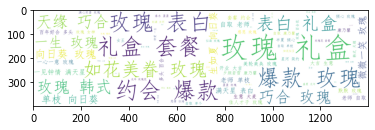

In [44]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(font_path='simfang.ttf',background_color='white',width=1400,height = 400)
wordcloud.generate(' '.join(text_list))

plt.imshow(wordcloud)

In [45]:
lis = ['玫瑰','康乃馨','向日葵','礼盒','11','19','33','52',]
for i  in lis:
    wenzi(df,i,'商品名称')

关于“玫瑰”的订单数量是： 663
关于“康乃馨”的订单数量是： 46
关于“向日葵”的订单数量是： 123
关于“礼盒”的订单数量是： 334
关于“11”的订单数量是： 362
关于“19”的订单数量是： 76
关于“33”的订单数量是： 110
关于“52”的订单数量是： 15


In [74]:
import jieba.analyse
# index = 1000
# 提取关键字
X = ' '.join(jieba.analyse.extract_tags(content, topK=20,withWeight=False))
tag = jieba.analyse.extract_tags(content,topK = 20,withWeight = True)
tags_list  = []
for i in tag:
    tags_list.append((i[0],i[1]))
tags_pd = pd.DataFrame(tags_list, columns=['word', 'weight'])  # 创建数据框
tags_pd

,word,weight
0,玫瑰,1.525223
1,11,1.166476
2,礼盒,0.885886
3,爆款,0.483346
4,表白,0.450347
5,套餐,0.374135
6,33,0.354454
7,约会,0.343736
8,向日葵,0.311673
9,如花美眷,0.303583


In [48]:
def drop_(data,a):
    df = data.drop_duplicates(subset=a,inplace=False,keep = 'last')
    list_ = list(df[a])
    list_sum = []
    list_sum_ = []
    list__ = []
    dict_one = {}
    dict_ = {}
    for i in range(len(list_)):
        b = list_[i]
        sum_ = data[data[a] == b ]['实收金额'].sum()
        if sum_ > 1 :
            list__.append(b)
            dict_[b] = sum_
        else:
            list_sum.append(b)
            dict_one[b] = sum_
    k = [list__,dict_,dict_one]
    return k

In [49]:
dice = drop_(df,'下单门店')
dice

[['邂逅花坊鲜花(盛缘花卉)',
  '邂逅花坊鲜花(欢庆鲜花店)',
  '邂逅花坊鲜花(最美时光花艺店)',
  '邂逅花坊鲜花(艾诺鲜花)',
  '邂逅花坊鲜花(娟娟花艺坊)',
  '邂逅花坊鲜花(唯尚鲜花店)',
  '邂逅花坊鲜花(燕子鲜花)',
  '邂逅花坊鲜花(花叶景花坊)',
  '邂逅花坊鲜花(永红花艺馆)',
  '邂逅花坊鲜花(漪花园店)',
  '艺博花艺',
  '缤纷花艺',
  '鲜花小站',
  '邂逅花坊鲜花(米蘭花店)',
  '邂逅花坊鲜花(花趣花艺)',
  '邂逅花坊鲜花(情和缘鲜花)',
  '邂逅花坊鲜花(花语鲜花)',
  '邂逅花坊鲜花(时光花里店)',
  '邂逅花坊鲜花(友馨花坊)',
  '邂逅花坊鲜花(温馨花都)',
  '邂逅花坊鲜花(花艺空间店)',
  '邂逅花坊鲜花(百合花艺坊)',
  '邂逅花坊鲜花(鱼小姐店)',
  '邂逅花坊鲜花(爱花鲜花)',
  '邂逅花坊鲜花(紫金花坊店)',
  '邂逅花坊鲜花(如意花店)',
  '邂逅花坊(逍遥花店)',
  '邂逅花坊鲜花(花沁阁花坊)',
  '邂逅花坊鲜花(墨兰鲜花店)',
  '韦爵爷生活花艺馆',
  '邂逅花坊鲜花(如夏花艺)',
  '邂逅花坊鲜花(花之缘鲜花)',
  '邂逅花坊(麦琪花艺)',
  '邂逅花坊鲜花(绿岛花苑)',
  '邂逅花坊鲜花(花草集)',
  '邂逅花坊鲜花(朝花夕拾)',
  '邂逅花坊鲜花(馥郁花屋)',
  '邂逅花坊鲜花(百花园店)',
  '邂逅花坊(喜来得鲜花店)',
  '邂逅花坊鲜花(甜蜜花艺店)',
  '邂逅花坊鲜花(飘香鲜花婚典)',
  '邂逅花坊鲜花林東花鸟鱼',
  '邂逅花坊鲜花(浪漫花都店)',
  '邂逅花坊鲜花(金喜缘鲜花)',
  '邂逅花坊鲜花(花样年华店)',
  '邂逅花坊鲜花(一花一匠)',
  '邂逅花坊鲜花爱尚花坊',
  '玫瑰鲜花香(四季馨鲜花裕华东路店)',
  '小立鲜花店(小立鲜花店（三河店）)',
  '邂逅花坊鲜花(童心花艺)',
  '花样年华(润和店)',
  '邂逅花坊鲜花(心愿花屋)',
  '小城故事鲜花坊',
  '邂逅花坊鲜花(浪漫满屋店)',
  '邂逅花坊鲜花(丽人鲜花)',
  '邂逅花坊鲜花(你洋鲜花店)',
  

In [58]:
dice_ = dice[1]
dice__ = dice[2]
dice_.update(dice__)

In [59]:
dice_

{'邂逅花坊鲜花(盛缘花卉)': 149.0,
 '邂逅花坊鲜花(欢庆鲜花店)': 309.0,
 '邂逅花坊鲜花(最美时光花艺店)': 318.0,
 '邂逅花坊鲜花(艾诺鲜花)': 348.0,
 '邂逅花坊鲜花(娟娟花艺坊)': 149.0,
 '邂逅花坊鲜花(唯尚鲜花店)': 218.0,
 '邂逅花坊鲜花(燕子鲜花)': 448.0,
 '邂逅花坊鲜花(花叶景花坊)': 497.0,
 '邂逅花坊鲜花(永红花艺馆)': 228.0,
 '邂逅花坊鲜花(漪花园店)': 199.0,
 '艺博花艺': 428.0,
 '缤纷花艺': 149.0,
 '鲜花小站': 368.0,
 '邂逅花坊鲜花(米蘭花店)': 706.0,
 '邂逅花坊鲜花(花趣花艺)': 149.0,
 '邂逅花坊鲜花(情和缘鲜花)': 179.0,
 '邂逅花坊鲜花(花语鲜花)': 199.0,
 '邂逅花坊鲜花(时光花里店)': 169.0,
 '邂逅花坊鲜花(友馨花坊)': 189.0,
 '邂逅花坊鲜花(温馨花都)': 436.0,
 '邂逅花坊鲜花(花艺空间店)': 28.0,
 '邂逅花坊鲜花(百合花艺坊)': 328.0,
 '邂逅花坊鲜花(鱼小姐店)': 338.0,
 '邂逅花坊鲜花(爱花鲜花)': 729.0,
 '邂逅花坊鲜花(紫金花坊店)': 179.0,
 '邂逅花坊鲜花(如意花店)': 228.0,
 '邂逅花坊(逍遥花店)': 189.0,
 '邂逅花坊鲜花(花沁阁花坊)': 807.0,
 '邂逅花坊鲜花(墨兰鲜花店)': 298.0,
 '韦爵爷生活花艺馆': 458.0,
 '邂逅花坊鲜花(如夏花艺)': 309.0,
 '邂逅花坊鲜花(花之缘鲜花)': 498.0,
 '邂逅花坊(麦琪花艺)': 617.0,
 '邂逅花坊鲜花(绿岛花苑)': 408.0,
 '邂逅花坊鲜花(花草集)': 338.0,
 '邂逅花坊鲜花(朝花夕拾)': 875.0,
 '邂逅花坊鲜花(馥郁花屋)': 855.0,
 '邂逅花坊鲜花(百花园店)': 179.0,
 '邂逅花坊(喜来得鲜花店)': 1665.0,
 '邂逅花坊鲜花(甜蜜花艺店)': 169.0,
 '邂逅花坊鲜花(飘香鲜花婚典)': 458.0,
 '邂逅花坊鲜花林東花鸟鱼': 1634.0,
 '邂逅花坊

In [60]:
dice_sum = pd.DataFrame(pd.Series(dice_), columns=['count'])
dice_sum = dice_sum.reset_index().rename(columns={'name':'count_'})
dice_sum = dice_sum.sort_values(by='count',ascending=False)

In [62]:
def drop_1(data,a):
    df = data.drop_duplicates(subset=a,inplace=False,keep = 'last')
    list_ = list(df[a])
    list_sum = []
    list_sum_ = []
    list__ = []
    dict_one = {}
    dict_ = {}
    for i in range(len(list_)):
        b = list_[i]
        sum_ = data[data[a] == b ]['订单号'].count()
        if sum_ > 1 :
            list__.append(b)
            dict_[b] = sum_
        else:
            list_sum.append(b)
            dict_one[b] = sum_
    k = [list__,dict_,dict_one]
    return k

In [67]:
dice1 = drop_1(df,'下单门店')
dice_1 = dice1[1]
dice__1 = dice1[2]
dice_.update(dice__1)
dice_1

{'邂逅花坊鲜花(最美时光花艺店)': 2,
 '邂逅花坊鲜花(艾诺鲜花)': 2,
 '邂逅花坊鲜花(燕子鲜花)': 2,
 '邂逅花坊鲜花(花叶景花坊)': 2,
 '艺博花艺': 2,
 '鲜花小站': 2,
 '邂逅花坊鲜花(米蘭花店)': 3,
 '邂逅花坊鲜花(温馨花都)': 3,
 '邂逅花坊鲜花(百合花艺坊)': 2,
 '邂逅花坊鲜花(鱼小姐店)': 2,
 '邂逅花坊鲜花(花沁阁花坊)': 3,
 '邂逅花坊鲜花(墨兰鲜花店)': 2,
 '韦爵爷生活花艺馆': 2,
 '邂逅花坊鲜花(花之缘鲜花)': 2,
 '邂逅花坊(麦琪花艺)': 3,
 '邂逅花坊鲜花(绿岛花苑)': 2,
 '邂逅花坊鲜花(花草集)': 2,
 '邂逅花坊鲜花(朝花夕拾)': 5,
 '邂逅花坊鲜花(馥郁花屋)': 4,
 '邂逅花坊(喜来得鲜花店)': 5,
 '邂逅花坊鲜花(飘香鲜花婚典)': 2,
 '邂逅花坊鲜花林東花鸟鱼': 6,
 '邂逅花坊鲜花(浪漫花都店)': 4,
 '邂逅花坊鲜花爱尚花坊': 3,
 '玫瑰鲜花香(四季馨鲜花裕华东路店)': 2,
 '小立鲜花店(小立鲜花店（三河店）)': 2,
 '花样年华(润和店)': 3,
 '小城故事鲜花坊': 3,
 '邂逅花坊鲜花(浪漫满屋店)': 5,
 '邂逅花坊鲜花(你洋鲜花店)': 2,
 '爱慕花艺': 2,
 '邂逅花坊鲜花(原野花艺)': 5,
 '邂逅花坊鲜花(时尚花坊)': 5,
 '邂逅花坊鲜花(紫涵花兿)': 6,
 '邂逅花坊鲜花(八姐鲜花店)': 8,
 '锦尚鲜花(雅韵鲜花店)': 6,
 '邂逅花坊鲜花(百花派店)': 9,
 '邂逅花坊鲜花(美好鲜花)': 6,
 '邂逅花坊鲜花(SaSa花艺生活馆)': 3,
 '邂逅花坊鲜花(百合花坊)': 8,
 '邂逅花坊鲜花(邻家花艺店)': 5,
 '印象IOO鲜花': 19,
 '邂逅花坊鲜花(雅琳花艺店)': 2,
 '花语鲜花店': 5,
 '邂逅花坊鲜花(花语嫣然店)': 5,
 '花草当家鲜花店': 5,
 '邂逅花坊鲜花(千艺鲜花)': 15,
 '邂逅花坊鲜花(花无缺)': 5,
 '邂逅花坊鲜花(原色店)': 3,
 '邂逅花坊鲜花(心永恒婚礼定制)': 2,
 '邂逅花坊鲜花(芳香花店)': 2,
 '邂逅花

In [68]:
dice_excel = pd.DataFrame(pd.Series(dice_1), columns=['count'])
dice_excel = dice_excel.reset_index().rename(columns={'name':'count_'})
dice_excel = dice_excel.sort_values(by='count',ascending=False)

In [69]:
data = pd.merge(dice_excel,dice_sum,on = 'index')

In [70]:
data

,index,count_x,count_y
0,邂逅花坊鲜花(知音婚庆鲜花店),49,9887.2
1,邂逅花坊鲜花(婷雅花坊店),36,7649.0
2,花语鲜花,29,5732.2
3,邂逅花坊鲜花(普罗旺斯婚庆),28,5585.4
4,邂逅花坊鲜花(七彩鲜花),27,5691.0
...,...,...,...
116,邂逅花坊鲜花(心永恒婚礼定制),2,378.0
117,邂逅花坊鲜花(芳香花店),2,277.0
118,三叶草花艺坊,2,528.0
119,美洋有约鲜花,2,498.0


In [71]:
data.to_excel('七夕订单详情.xlsx')